In [26]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [27]:
class BmiState(TypedDict):
    weight:float
    height:float
    bmi:float
    category:str

In [33]:
def cacl_bmi(state:BmiState)-> BmiState:
    weight=state['weight']
    height=state['height']
    bmi=weight/(height**2)
    state['bmi']=round(bmi,2)
    return state

def level_bmi(state:BmiState)-> BmiState:
    bmi=state['bmi']
    if bmi <18.5:
        state['category']="underweight"
    elif 18.5 <= bmi <25:
        state['category']="normal"
    elif 25 <= bmi < 30:
        state['category']="Overweight"
    else:
        state['category']="Obese"
    return state

In [34]:
graph=StateGraph(BmiState)
graph.add_node("cacl_bmi",cacl_bmi)
graph.add_node("level_bmi",level_bmi)

In [35]:
graph.add_edge(START,"cacl_bmi")
graph.add_edge("cacl_bmi","level_bmi")
graph.add_edge("level_bmi",END)
workflow=graph.compile()

In [36]:
workflow.invoke({"weight":40,"height":1.4})

{'weight': 40, 'height': 1.4, 'bmi': 20.41, 'category': 'normal'}

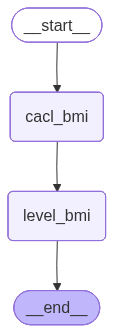

In [32]:
from IPython.display import Image

# Call the method to get the PNG bytes
Image(workflow.get_graph().draw_mermaid_png())

